In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff #This can create interactive plots
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import plotly.express as px

- female = 1, male = 2
- Yes = 1, No = 2

# <font color=#00BBFF> Loading Data </font>

In [2]:
cancer = pd.read_csv('/Users/hayashieijun/Desktop/CMSEproject/indian_liver_patient.csv')
print(cancer.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB
None


In [3]:
cancer.head(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [4]:
cancer.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,583.0,44.746141,16.189833,4.0,33.0,45.00,58.0,90.0
Total_Bilirubin,583.0,3.298799,6.209522,0.4,0.8,1.00,2.6,75.0
Direct_Bilirubin,583.0,1.486106,2.808498,0.1,0.2,0.30,1.3,19.7
Alkaline_Phosphotase,583.0,290.576329,242.937989,63.0,175.5,208.00,298.0,2110.0
Alamine_Aminotransferase,583.0,80.713551,182.620356,10.0,23.0,35.00,60.5,2000.0
Aspartate_Aminotransferase,583.0,109.910806,288.918529,10.0,25.0,42.00,87.0,4929.0
Total_Protiens,583.0,6.483190,1.085451,2.7,5.8,6.60,7.2,9.6
Albumin,583.0,3.141852,0.795519,0.9,2.6,3.10,3.8,5.5
Albumin_and_Globulin_Ratio,579.0,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8
Dataset,583.0,1.286449,0.452490,1.0,1.0,1.00,2.0,2.0


In [5]:
cancer.shape

(583, 11)

In [6]:
cancer.duplicated().sum()

np.int64(13)

In [7]:
cancer_clean = cancer.drop_duplicates(keep='first')
cancer_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 570 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         570 non-null    int64  
 1   Gender                      570 non-null    object 
 2   Total_Bilirubin             570 non-null    float64
 3   Direct_Bilirubin            570 non-null    float64
 4   Alkaline_Phosphotase        570 non-null    int64  
 5   Alamine_Aminotransferase    570 non-null    int64  
 6   Aspartate_Aminotransferase  570 non-null    int64  
 7   Total_Protiens              570 non-null    float64
 8   Albumin                     570 non-null    float64
 9   Albumin_and_Globulin_Ratio  566 non-null    float64
 10  Dataset                     570 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 53.4+ KB


In [8]:
cancer_clean.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [9]:
cancer_clean['Gender'].value_counts()

Gender
Male      430
Female    140
Name: count, dtype: int64

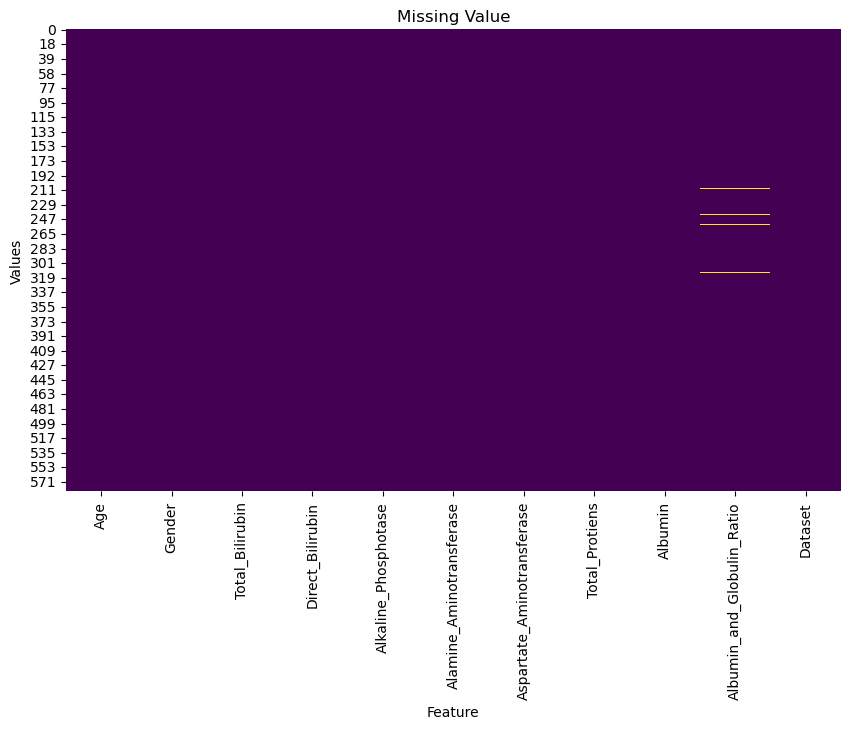

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(cancer_clean.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Value")
plt.xlabel("Feature")
plt.ylabel("Values")
plt.show()

In [11]:
#show the row of missing values 
cancer_clean[cancer_clean['Albumin_and_Globulin_Ratio'].isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


# <font color=#00BBFF> Data type conversion </font>

In [12]:
#"Gender": Female=1, Male=2
gender_convert = {
    'Female': 1,
    'Male': 2,
}
cancer_clean['Gender'] = cancer_clean['Gender'].replace(gender_convert)
cancer_clean.head(10)

/var/folders/cq/hl3j32w16cb80bz20lcyxw4m0000gn/T/ipykernel_97553/1476489220.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cancer_clean['Gender'] = cancer_clean['Gender'].replace(gender_convert)


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,2,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,2,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,2,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,2,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,2,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,1,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,1,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,2,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,2,0.7,0.2,290,53,58,6.8,3.4,1.00,1


# <font color=#00BBFF> Imputation </font>

In [13]:
#impute missingvalues by KNN
imputer = KNNImputer(n_neighbors=5)
imputed_data_array = imputer.fit_transform(cancer_clean)#fit_transform是一個Scikit-learn中的function，處理完missing value後會輸出numpy，下一步驟是將numpy轉成pandas
cancer_clean = pd.DataFrame(
    imputed_data_array, 
    columns=cancer_clean.columns, 
    index=cancer_clean.index
)
#check missing value
cancer_clean.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [14]:
cancer_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,570.0,44.849123,16.242182,4.0,33.0,45.00,58.00,90.0
Gender,570.0,1.754386,0.430829,1.0,2.0,2.00,2.00,2.0
Total_Bilirubin,570.0,3.321754,6.267941,0.4,0.8,1.00,2.60,75.0
Direct_Bilirubin,570.0,1.497544,2.833231,0.1,0.2,0.30,1.30,19.7
Alkaline_Phosphotase,570.0,291.750877,245.291859,63.0,176.0,208.00,298.00,2110.0
Alamine_Aminotransferase,570.0,79.728070,181.471697,10.0,23.0,35.00,60.00,2000.0
Aspartate_Aminotransferase,570.0,109.380702,290.880671,10.0,25.0,41.00,86.75,4929.0
Total_Protiens,570.0,6.496316,1.088300,2.7,5.8,6.60,7.20,9.6
Albumin,570.0,3.148947,0.796813,0.9,2.6,3.10,3.80,5.5
Albumin_and_Globulin_Ratio,570.0,0.947740,0.318629,0.3,0.7,0.95,1.10,2.8


# <font color=#00BBFF> Outliers </font>

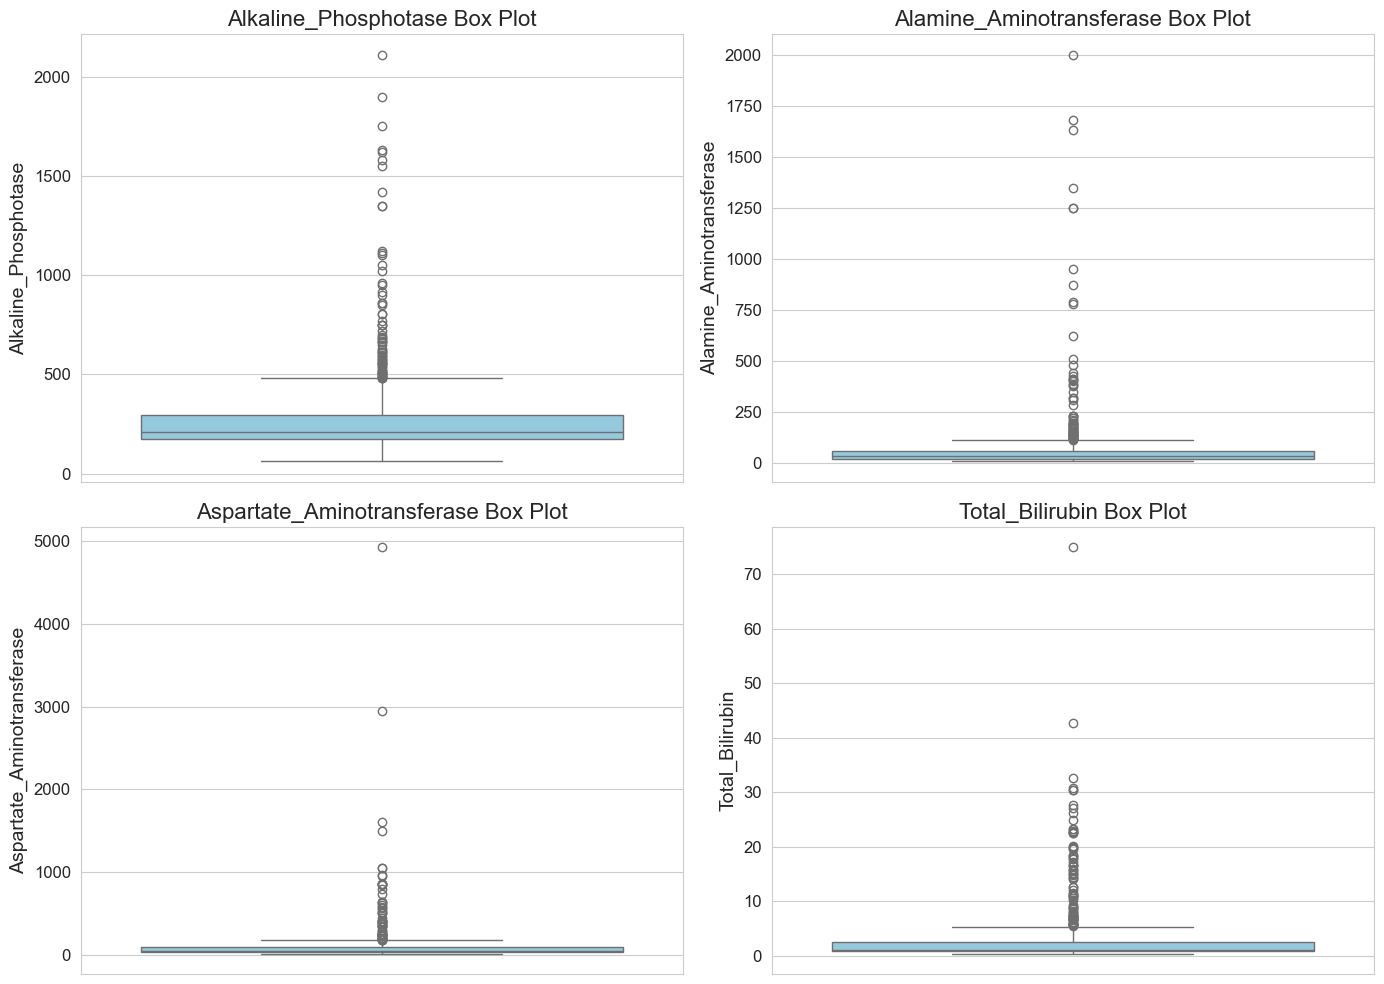

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
#original outliers
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12

outlier_columns = [
    'Alkaline_Phosphotase', 
    'Alamine_Aminotransferase', 
    'Aspartate_Aminotransferase',
    'Total_Bilirubin'
]

# 創建一個圖表視窗，包含多個子圖
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
# 將 axes 扁平化，方便迭代
axes = axes.flatten()

# 逐一繪製每個選定欄位的箱形圖
for i, col in enumerate(outlier_columns):
    sns.boxplot(y=cancer_clean[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'{col} Box Plot', fontsize=16)
    axes[i].set_ylabel(col, fontsize=14)

# 調整子圖間距，避免重疊
plt.tight_layout()
plt.show()

In [16]:
#Log transformation
log_transform_cols = [
    'Total_Bilirubin', 
    'Direct_Bilirubin',
    'Alkaline_Phosphotase', 
    'Alamine_Aminotransferase', 
    'Aspartate_Aminotransferase'
]
#copy the original data
cancer_transformed = cancer_clean.copy()
for col in log_transform_cols:
    new_col = col + '_log' #create new column to store the log data
    cancer_transformed[new_col] = np.log1p(cancer_transformed[col]) #log transformation, log1p can also solve the negative numbers

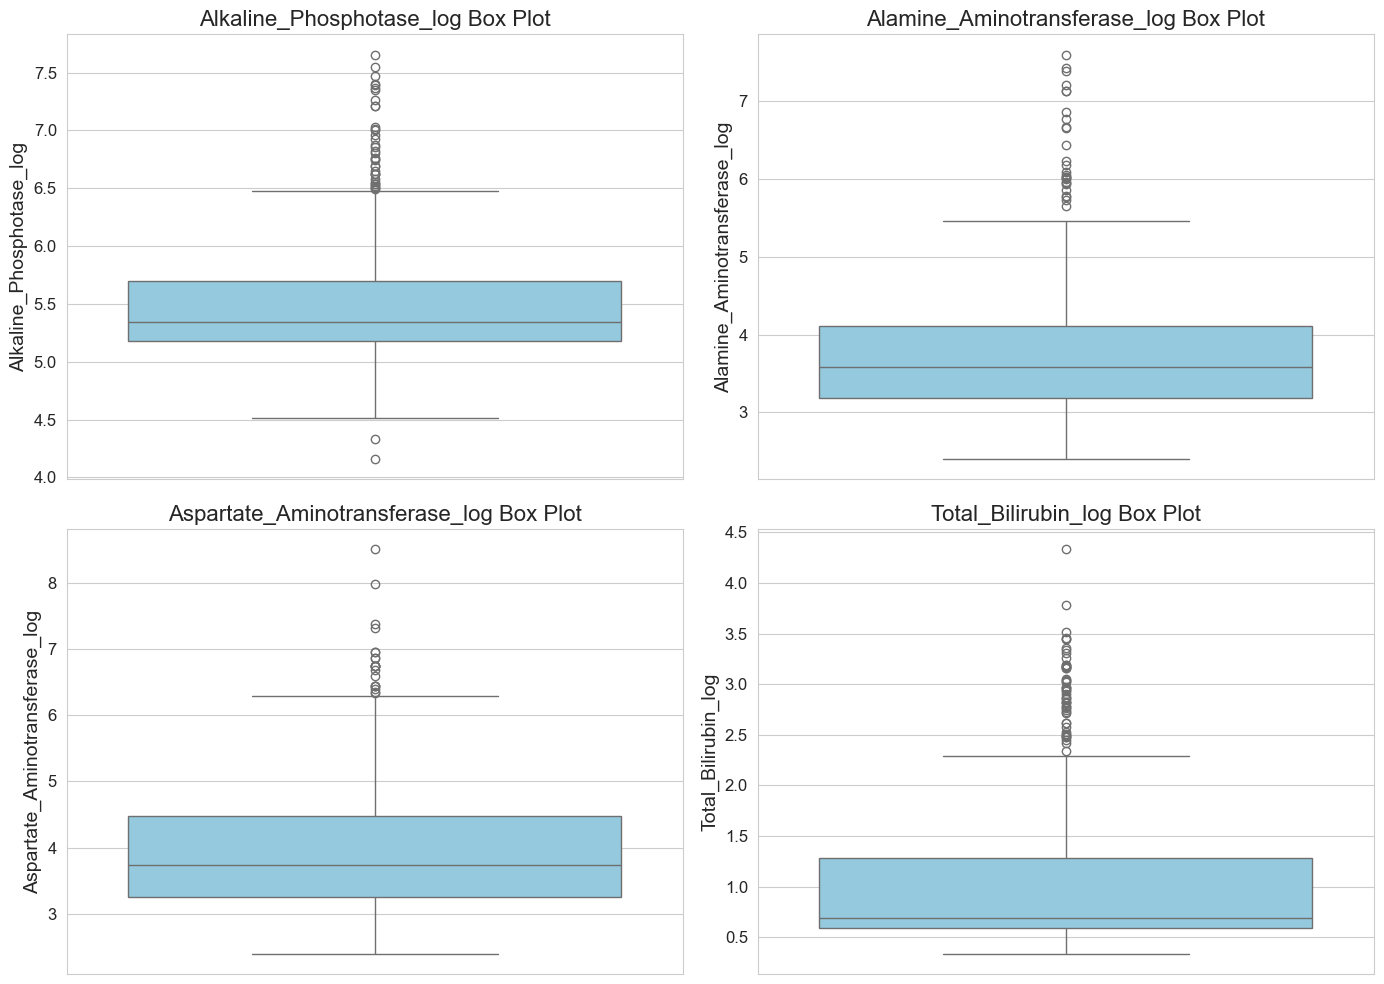

In [17]:
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12

outlier_columns = [
    'Alkaline_Phosphotase_log', 
    'Alamine_Aminotransferase_log', 
    'Aspartate_Aminotransferase_log',
    'Total_Bilirubin_log'
]

# 創建一個圖表視窗，包含多個子圖
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
# 將 axes 扁平化，方便迭代
axes = axes.flatten()

# 逐一繪製每個選定欄位的箱形圖
for i, col in enumerate(outlier_columns):
    sns.boxplot(y=cancer_transformed[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'{col} Box Plot', fontsize=16)
    axes[i].set_ylabel(col, fontsize=14)

# 調整子圖間距，避免重疊
plt.tight_layout()
plt.show()

In [18]:
#Standardization
#log transformation columns, if you wanna run standardscaler, you have to make sure the data is 2-D array
log_standard_cols = [
    'Total_Bilirubin_log', 
    'Direct_Bilirubin_log',
    'Alkaline_Phosphotase_log', 
    'Alamine_Aminotransferase_log', 
    'Aspartate_Aminotransferase_log']
log_standard = cancer_transformed[log_standard_cols]
cancer_scaled_log = StandardScaler().fit_transform(log_standard)
#cancer_scaled_log is an array without name of columns(use print(type(cancer_scaled_log))can check the form)

#create new dataframe to store data
df_scaled = pd.DataFrame(
    cancer_scaled_log, #array
    columns=log_standard_cols #name of columns
)
cancer_transformed[log_standard_cols] = df_scaled #replace the standardized columns into original dataframe
print(log_standard.std())

Total_Bilirubin_log               0.742371
Direct_Bilirubin_log              0.659892
Alkaline_Phosphotase_log          0.530062
Alamine_Aminotransferase_log      0.880264
Aspartate_Aminotransferase_log    0.981827
dtype: float64


In [19]:
cancer=cancer_transformed.dropna()

In [20]:
cancer.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,557.0,44.964093,16.187707,4.000000,33.000000,45.000000,58.000000,85.000000
Gender,557.0,1.748654,0.434177,1.000000,1.000000,2.000000,2.000000,2.000000
Total_Bilirubin,557.0,3.234111,6.202687,0.400000,0.800000,1.000000,2.500000,75.000000
Direct_Bilirubin,557.0,1.442549,2.758395,0.100000,0.200000,0.300000,1.200000,19.700000
Alkaline_Phosphotase,557.0,291.389587,246.801592,63.000000,175.000000,208.000000,298.000000,2110.000000
Alamine_Aminotransferase,557.0,80.495512,183.463889,10.000000,23.000000,35.000000,61.000000,2000.000000
Aspartate_Aminotransferase,557.0,110.292639,294.150317,10.000000,25.000000,41.000000,85.000000,4929.000000
Total_Protiens,557.0,6.501257,1.094204,2.700000,5.800000,6.600000,7.200000,9.600000
Albumin,557.0,3.156014,0.796138,0.900000,2.600000,3.100000,3.800000,5.500000
Albumin_and_Globulin_Ratio,557.0,0.944600,0.304781,0.300000,0.700000,0.950000,1.100000,2.800000


# <font color=#00BBFF> Correlation Heatmap </font>

In [21]:
continuous_cols = ['Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens',
                   'Albumin','Albumin_and_Globulin_Ratio']
correlation_matrix = cancer[continuous_cols].corr().round(4).values #round() can let decrease the number of decimal places 
fig_heatmap = ff.create_annotated_heatmap(
    z=correlation_matrix,
    x=continuous_cols,
    y=continuous_cols,
    colorscale='Reds' # you can use "Plasma", "Viridis", "Reds", "Blues", "RdBu", "Portland", "Spectral"
)
fig_heatmap.update_layout(
    font=dict(size=10),
    title="Correlation Heatmap (Interactive)",
    xaxis_title="Features",
    yaxis_title="Features"
)
fig_heatmap.show()

# <font color=#00BBFF> Merge three datasets </font>

In [22]:
#loading dataset
df_hepatitis=pd.read_csv('/Users/hayashieijun/Desktop/CMSEproject/hepatitis_clenan.csv')
df_cirrohsis=pd.read_csv('/Users/hayashieijun/Desktop/CMSEproject/cirrohsis_clenan.csv')

In [23]:
#rename the column
df_hepatitis.rename(columns={'Sex':'Gender'}, inplace=True)
df_cirrohsis.rename(columns={'Sex':'Gender'}, inplace=True)

In [24]:
#create "ID" column in each dataset
#hepatitis 
N = len(df_hepatitis)
sequence = pd.Series(range(1, N + 1))
formatted_numbers = sequence.apply(lambda x: f"{x:04d}")
prefix = 'A_hepat'
df_hepatitis['ID'] = prefix + formatted_numbers.values
#cirrohsis
N = len(df_cirrohsis)
sequence = pd.Series(range(1, N + 1))
formatted_numbers = sequence.apply(lambda x: f"{x:04d}")
prefix = 'B_cirroh'
df_cirrohsis['ID'] = prefix + formatted_numbers.values
#cancer
N = len(cancer)
sequence = pd.Series(range(1, N + 1))
formatted_numbers = sequence.apply(lambda x: f"{x:04d}")
prefix = 'C_cancer'
cancer['ID'] = prefix + formatted_numbers.values

In [25]:
#set up common key
COMMON_KEYS = ['Age', 'Gender', 'ID']
def create_merge_key(df, keys):
    #choose [keys] that are in df. Doing type conversion, all of content convert into string. agg means aggregate and using "_" to join strings
    df['Merge_Key'] = df[keys].astype(str).agg('_'.join, axis=1)
    return df
df_A = create_merge_key(df_hepatitis, COMMON_KEYS) 
df_B = create_merge_key(df_cirrohsis, COMMON_KEYS)
df_C = create_merge_key(cancer, COMMON_KEYS)

In [26]:
#merge df_A and df_B
df_merged_AB = pd.merge(
    df_A, 
    df_B, 
    on='Merge_Key', 
    how='outer',       # Outer Join: Retain all records from both A and B. 外連接：保留所有 A 和 B 的記錄
    suffixes=('_A', '_B') # distinguish betweer different columns but they have same name. 區分兩個資料集中同名的欄位，如 Age_A 和 Age_B
)
#merge df_merged_AB and df_C
df_final = pd.merge(
    df_merged_AB, 
    df_C, 
    on='Merge_Key',
    how='outer',       
    suffixes=('_merged', '_C') 
)

# <font color=#00BBFF> Advanced Imputation </font>

In [27]:
#using KNN imputation
cols_to_impute = df_final.select_dtypes(include=['float64']).columns #finding out columns that need to be imputed
imputer = KNNImputer(n_neighbors=5) #set the imputer
imputed_data_array = imputer.fit_transform(df_final[cols_to_impute])#fit_transform will output array and then running KNN function
df_final[cols_to_impute] = imputed_data_array
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1130 entries, 0 to 1129
Data columns (total 58 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age_A                           1130 non-null   float64
 1   Gender_A                        1130 non-null   float64
 2   Steroid                         1130 non-null   float64
 3   Antivirals                      1130 non-null   float64
 4   Fatigue                         1130 non-null   float64
 5   Malaise                         1130 non-null   float64
 6   Anorexia                        1130 non-null   float64
 7   Liver Big                       1130 non-null   float64
 8   Liver Firm                      1130 non-null   float64
 9   Spleen Palpable                 1130 non-null   float64
 10  Spiders_A                       1130 non-null   float64
 11  Ascites_A                       1130 non-null   float64
 12  Varices                         11

In [28]:
drop_column=['ID']
df_final_clean = df_final.drop(drop_column, axis=1)

# <font color=#00BBFF> Visualization </font>

In [29]:
vio_gender_age_can = px.violin(cancer, x='Gender', y='Age', box=True, points='all',
                           labels={'Gender':'Gender', 'Age':'Age'},
                           title="Interactive Violin Plot of Gender vs Age")
vio_gender_age_can.show()

In [30]:
vio_gender_age_hep = px.violin(df_hepatitis, x='Gender', y='Age', box=True, points='all',
                           labels={'Gender':'Gender', 'Age':'Age'},
                           title="Interactive Violin Plot of Gender vs Age")
vio_gender_age_hep.show()

In [31]:
vio_gender_age_cirro = px.violin(df_cirrohsis, x='Gender', y='Age', box=True, points='all',
                           labels={'Gender':'Gender', 'Age':'Age'},
                           title="Interactive Violin Plot of Gender vs Age")
vio_gender_age_cirro.show()

In [32]:
df = df_final 
fig = px.scatter_3d(
    df, 
    x='Age', 
    y='Total_Bilirubin', 
    z='Aspartate_Aminotransferase',  
    color='Age', 
    opacity=0.7, 
    title='3D Interaction: Age, Albumin Ratio, and Bilirubin Severity'
)

fig.show()

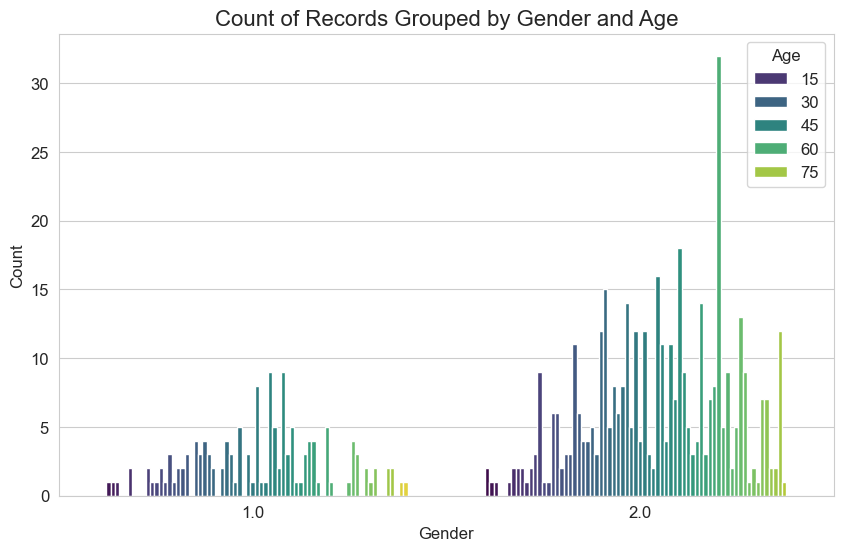

In [33]:
plt.figure(figsize=(10, 6))

# 繪製分組計數圖 (Grouped Count Plot)
sns.countplot(
    x='Gender', 
    data=cancer, 
    hue='Age',        # <-- HUE 參數定義了分組變數 (例如，依據疾病分期分組)
    palette='viridis'   # 選擇一個顏色盤
)

plt.title('Count of Records Grouped by Gender and Age', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

# <font color=#00BBFF> Feature Engineering </font>

In [34]:
df_final['Bilirubin_Albumin_Ratio'] = df_final['Total_Bilirubin'] / df_final['Albumin']
df_final['ALT_AST_Ratio'] = df_final['Alamine_Aminotransferase'] / df_final['Aspartate_Aminotransferase']

# <font color=#00BBFF> Model </font>

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report
import numpy as np
#logistic regression
TARGET_COLUMN = 'Dataset'
FEATURE_COLS = [
    'Total_Bilirubin_log', 
    'Aspartate_Aminotransferase_log', 
    'Albumin', 
    'Age', 
    'Gender'
]
X = cancer[FEATURE_COLS]
y = cancer[TARGET_COLUMN]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y 
)
log_model = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42)
log_model.fit(X_train, y_train)
y_prob = log_model.predict_proba(X_test)[:, 1]
print("\n測試集前 5 個樣本的得病機率:")
for i, prob in enumerate(y_prob[:5]):
    print(f"樣本 {i+1}：得病機率為 {prob:.4f}")
y_pred = log_model.predict(X_test)

roc_auc = roc_auc_score(y_test, y_prob)
print(f"\n--- 模型評估報告 (使用指定 6 個特徵) ---")
print(f"ROC AUC Score: {roc_auc:.4f}")
print("\n分類報告 (Classification Report):")
print(classification_report(y_test, y_pred))


測試集前 5 個樣本的得病機率:
樣本 1：得病機率為 0.3493
樣本 2：得病機率為 0.2662
樣本 3：得病機率為 0.3963
樣本 4：得病機率為 0.6308
樣本 5：得病機率為 0.3549

--- 模型評估報告 (使用指定 6 個特徵) ---
ROC AUC Score: 0.5677

分類報告 (Classification Report):
              precision    recall  f1-score   support

         1.0       0.77      0.61      0.68        79
         2.0       0.38      0.58      0.46        33

    accuracy                           0.60       112
   macro avg       0.58      0.59      0.57       112
weighted avg       0.66      0.60      0.62       112



In [36]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

print("--- 實作模型二：隨機森林 (Random Forest) ---")

# 初始化隨機森林分類器
rf_model = RandomForestClassifier(
    n_estimators=200,      # 增加樹的數量以提高穩健性
    max_depth=10,          # 限制樹的深度以防過度擬合
    random_state=42,
    # 使用 class_weight='balanced' 處理數據不平衡
    class_weight='balanced' 
)
rf_model.fit(X_train, y_train)

# 預測並評估
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

print(f"ROC AUC Score (Random Forest): {roc_auc_score(y_test, y_prob_rf):.4f}")
print("\n分類報告 (Random Forest):")
print(classification_report(y_test, y_pred_rf))

--- 實作模型二：隨機森林 (Random Forest) ---
ROC AUC Score (Random Forest): 0.5742

分類報告 (Random Forest):
              precision    recall  f1-score   support

         1.0       0.71      0.87      0.78        79
         2.0       0.33      0.15      0.21        33

    accuracy                           0.66       112
   macro avg       0.52      0.51      0.50       112
weighted avg       0.60      0.66      0.61       112



In [39]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score

print("--- 實作模型三：支持向量機 (SVC) ---")

# 初始化 SVC 模型
# 我們使用 probability=True 來確保可以輸出機率 (雖然會增加計算時間)
# kernel='linear' 是最簡單且穩定的選擇
svc_model = SVC(
    kernel='linear', 
    random_state=42,
    class_weight='balanced', # 關鍵：處理數據不平衡
    probability=True         # 讓模型能夠輸出 ROC AUC 所需的機率
)

# 訓練模型
svc_model.fit(X_train, y_train)

# 預測並評估
y_pred_svc = svc_model.predict(X_test)
y_prob_svc = svc_model.predict_proba(X_test)[:, 1]

print("SVC 模型訓練完成。")
print(f"ROC AUC Score (SVC): {roc_auc_score(y_test, y_prob_svc):.4f}")
print("\n分類報告 (SVC):")
print(classification_report(y_test, y_pred_svc))

--- 實作模型三：支持向量機 (SVC) ---
SVC 模型訓練完成。
ROC AUC Score (SVC): 0.5777

分類報告 (SVC):
              precision    recall  f1-score   support

         1.0       0.76      0.59      0.67        79
         2.0       0.36      0.55      0.43        33

    accuracy                           0.58       112
   macro avg       0.56      0.57      0.55       112
weighted avg       0.64      0.58      0.60       112



In [40]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

print("--- 執行 RFE 進行特徵選擇 ---")

# 1. 使用加權羅吉斯迴歸作為基礎模型
estimator = LogisticRegression(
    solver='liblinear', 
    random_state=42, 
    class_weight='balanced'
)

# 2. 初始化 RFE：目標是選擇 10 個最佳特徵
rfe = RFE(estimator=estimator, n_features_to_select=10)

# 3. 在完整的訓練數據上擬合 (包含所有 OHE 和工程特徵)
# 假設 X_train 是包含所有特徵的訓練集
rfe.fit(X_train, y_train)

# 4. 取得被選中的特徵名稱
selected_features_rfe = X_train.columns[rfe.support_]

print(f"\nRFE 選出的 {len(selected_features_rfe)} 個最佳特徵:")
print(selected_features_rfe.tolist())

--- 執行 RFE 進行特徵選擇 ---

RFE 選出的 5 個最佳特徵:
['Total_Bilirubin_log', 'Aspartate_Aminotransferase_log', 'Albumin', 'Age', 'Gender']


/Users/hayashieijun/Desktop/anaconda3/lib/python3.13/site-packages/sklearn/feature_selection/_rfe.py:300: UserWarning:

Found n_features_to_select=10 > n_features=5. There will be no feature selection and all features will be kept.

